# Setting up the System

In [1]:
!pip install openai
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 51.9 MB/s eta 0:00:00


## To run in local system

In [4]:
import os

## To run in Google Colab

In [5]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY_1')

In [6]:
import openai
openai.api_key = OPENAI_API_KEY

## Enable Custom Knowledge to ChatGPT

In [8]:
!wget "https://mf.nipponindiaim.com/FundsAndPerformance/ProductNotes/NipponIndia-Short-Term-Fund-Jan-2024.pdf"

--2024-07-26 11:18:49--  https://mf.nipponindiaim.com/FundsAndPerformance/ProductNotes/NipponIndia-Short-Term-Fund-Jan-2024.pdf
Resolving mf.nipponindiaim.com (mf.nipponindiaim.com)... 104.16.173.97, 104.16.174.97, 2606:4700::6810:ae61, ...
Connecting to mf.nipponindiaim.com (mf.nipponindiaim.com)|104.16.173.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159788 (156K) [application/pdf]
Saving to: ‘NipponIndia-Short-Term-Fund-Jan-2024.pdf’

NipponIndia-Short-T 100%[===================>] 156.04K  --.-KB/s    in 0.04s   

2024-07-26 11:18:49 (3.70 MB/s) - ‘NipponIndia-Short-Term-Fund-Jan-2024.pdf’ saved [159788/159788]



#Break Down the Long Context Data

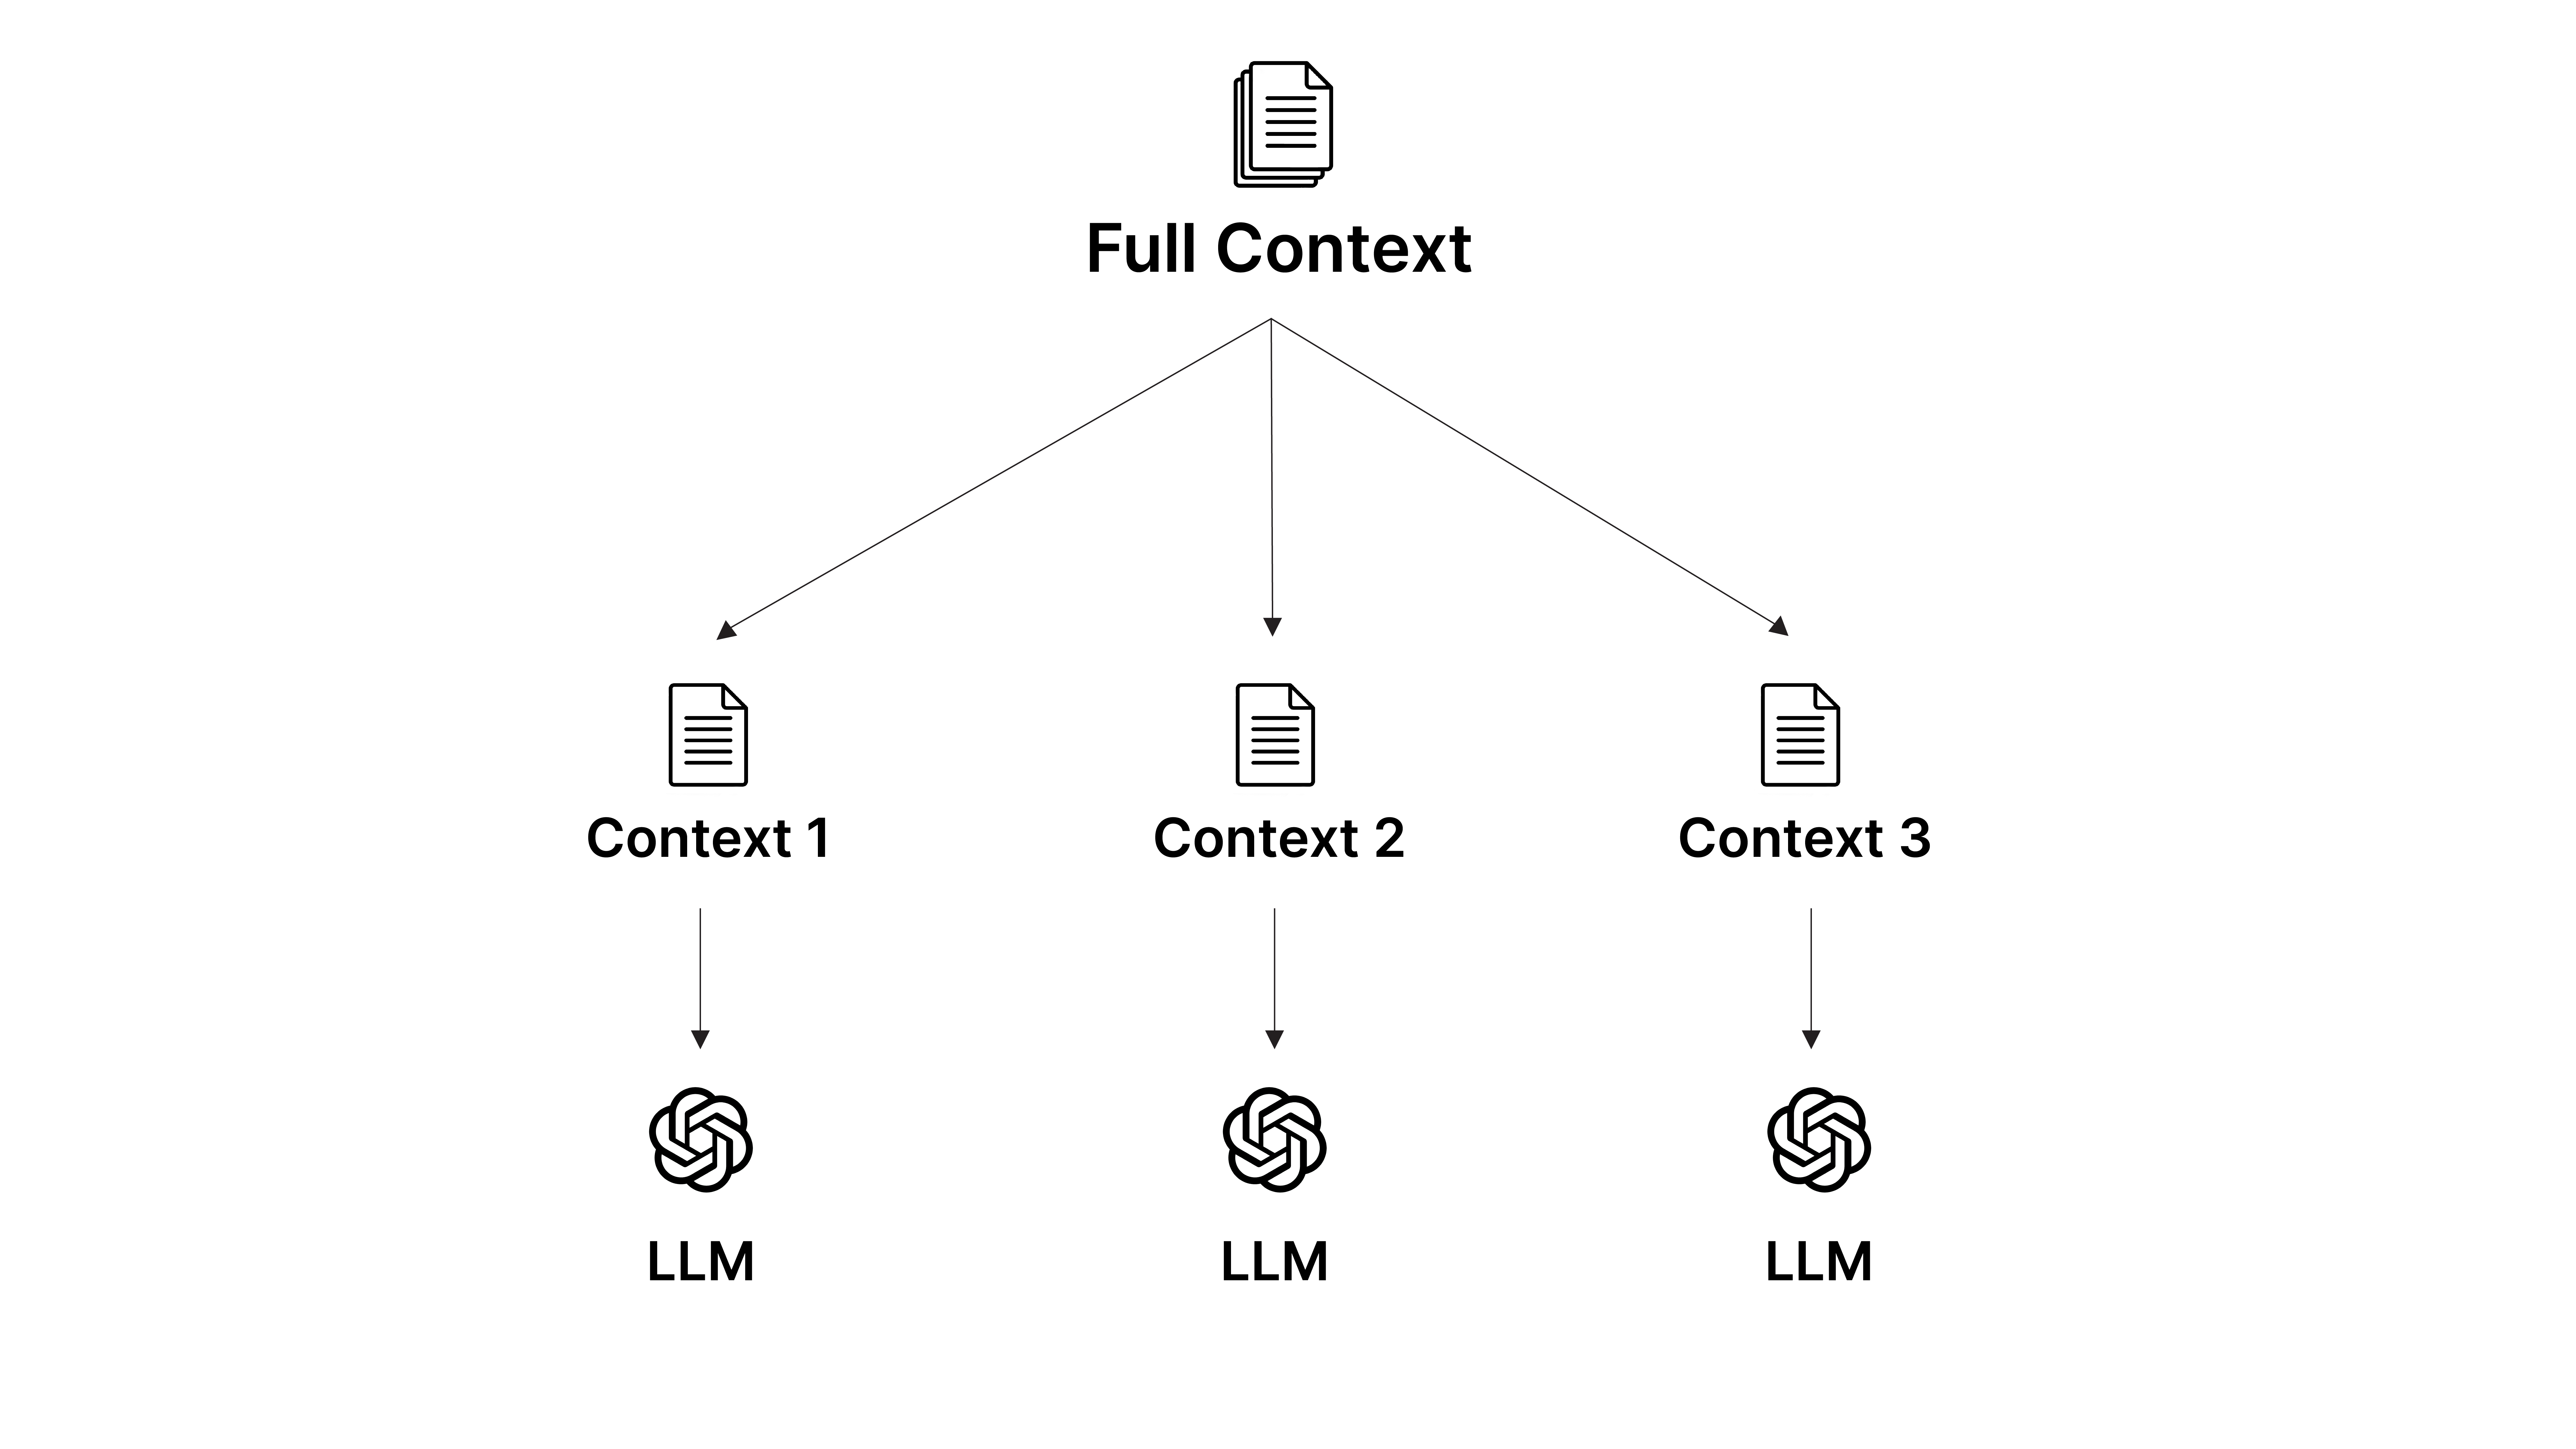

In [9]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    document = fitz.open(pdf_path)
    text = ""
    for page_num in range(len(document)):
        page = document.load_page(page_num)
        text += page.get_text()
    return text

# Replace with the actual path to the PDF file in your Colab environment
pdf_path = '/content/NipponIndia-Short-Term-Fund-Jan-2024.pdf'
pdf_text = extract_text_from_pdf(pdf_path)

In [17]:
def get_response(messages,model="gpt-3.5-turbo"):
  response = openai.chat.completions.create(
        model=model,
        messages=messages
        )
  return response.choices[0].message.content

Lets define the function for nippongpt:

In [18]:
def nippongpt(user_prompt,context):

  full_prompt = f'''Use the context given below for answering the question.
      question: {user_prompt}
      context:  {context}
    '''

  messages = [{'role':'system','content':'I want you to act like a chatbot for NipponIndia Short term Fund'},
           {"role":"user","content":full_prompt}]

  response=get_response(messages)
  return response

In [19]:
pdf_text

'Investment Horizon: 1 - 3 years\nContact your Mutual Fund Distributor  |  Call 1860 266 0111#, \n91-22-6925 9696# (For investors outside India)  |\nVisit mf.nipponindiaim.com\n#Charges applicable.\nNippon India \nShort Term Fund\n(An open ended short term debt scheme investing in \ninstruments such that the Macaulay duration of the \nportfolio is between 1 to 3 years. Relatively High interest \nrate risk and moderate Credit Risk)\nMutual Fund investments are subject to market risks, read all scheme related documents carefully.\nThis product is suitable for investors who are seeking*\n• Income over short term\n• Investment in debt & money market instruments with \nportfolio Macaulay Duration between 1- 3 years\n*Investors should consult their financial advisors \nif in doubt about  whether the product is suitable \nfor them.\nBenchmark Riskometer\nNippon India Short Term \nFund\nCRISIL Short Duration Debt \nB-II Index\nInvestors understand that their principal  \nwill be at Moderate ri

Prompt 1:

In [20]:
user_prompt = 'What is the document about?'
print(nippongpt(user_prompt,pdf_text))

The document is about the Nippon India Short Term Fund, which is an open-ended short-term debt scheme investing in instruments with a Macaulay duration of the portfolio ranging between 1 to 3 years. The fund aims to generate stable returns for investors with a short-term investment horizon by primarily investing in debt and money market instruments. The investment strategy includes predominantly investing in corporate bonds, G-Secs, and money market instruments in the 1-5 year duration bucket with a focus on enhancing returns through asset allocation and shaping the yield curve. The fund maintains a moderate duration strategy within the range of 1.25 to 2.75 years and is suitable for investors seeking income over the short term and moderate credit risk exposure.


Prompt 2:

In [21]:
user_prompt = 'How much can I invest and what is the risk associated with it?'
print(nippongpt(user_prompt,pdf_text))

For Nippon India Short Term Fund, the minimum application amount is Rs. 5,000 and can be invested in multiples of Re.1 thereafter. The fund invests in instruments with a Macaulay duration between 1 to 3 years, thereby carrying relatively high interest rate risk and moderate credit risk.

Considering the investment horizon of 1-3 years, it is suitable for investors seeking income over the short term and looking to invest in debt and money market instruments within this duration range. The fund primarily focuses on generating stable returns for investors with a short-term investment horizon by investing in Debt & Money Market Instruments.

The current investment strategy involves investing predominantly in corporate bonds, G-Secs, and money market instruments with durations falling in the 1-5 years bucket. The strategy aims to enhance returns through asset allocation and the shape of the yield curve, maintaining a moderate duration strategy within the range of 1.25 years to 2.75 years. T

Prompt 3:

In [22]:
user_prompt = 'How much is 1+2?'
print(nippongpt(user_prompt,pdf_text))

I'm sorry, but I am programmed to provide information about the Nippon India Short Term Fund and related queries. If you have any questions about the fund or need assistance regarding investing in it, feel free to ask!


Prompt 4

In [23]:
user_prompt = 'Give me the final summary of Document?'
print(nippongpt(user_prompt,pdf_text))

The final summary of Nippon India Short Term Fund is as follows:

- Investment Horizon: 1 - 3 years
- Suitable for investors seeking income over the short term and investing in debt & money market instruments with a portfolio Macaulay Duration between 1-3 years
- Relatively high interest rate risk and moderate credit risk
- Fund predominantly invests in corporate bonds, G-Secs, and money market instruments in the 1 - 5 years duration bucket
- The fund aims to generate stable returns for investors with a short-term investment horizon
- Strategy includes better credit quality assets (75-85% AAA), moderate duration strategy, and tactical allocation to G-Secs/SDLs
- Suitable for investors with moderate risk appetite and an investment horizon of around 1 - 3 years

For more information, contact your Mutual Fund Distributor, call 1860 266 0111#, or visit mf.nipponindiaim.com. Please note that charges are applicable.
